# Data Preprocess

In [44]:
import pandas as pd
import numpy as np


In [45]:
data_path = "data/tokyo_trade_price.csv"

In [46]:
# get data in 2019 only
df = pd.read_csv(data_path)
df = df[df["Year"] == 2019].drop(columns=["No"])
df

,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,...,Classification,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks
0,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,4.0,4.0,...,NaN,NaN,Commercial Zone,80.0,500.0,3rd quarter 2019,2019,3,Not yet,NaN
1,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,4.0,4.0,...,NaN,NaN,Commercial Zone,80.0,500.0,3rd quarter 2019,2019,3,Done,NaN
2,Residential Land(Land and Building),Commercial Area,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,2,2.0,2.0,...,Ward Road,4.0,Commercial Zone,80.0,500.0,2nd quarter 2019,2019,2,NaN,NaN
3,Residential Land(Land and Building),Commercial Area,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,1,1.0,1.0,...,Tokyo Metropolitan Road,27.0,Commercial Zone,80.0,700.0,2nd quarter 2019,2019,2,NaN,NaN
4,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,4.0,4.0,...,NaN,NaN,Commercial Zone,80.0,500.0,2nd quarter 2019,2019,2,Done,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359989,Forest Land,NaN,13401,Tokyo,Hachijo Town,Mitsune,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1st quarter 2019,2019,1,NaN,NaN
359990,Forest Land,NaN,13401,Tokyo,Hachijo Town,Mitsune,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1st quarter 2019,2019,1,NaN,NaN
359991,Residential Land(Land Only),Residential Area,13401,Tokyo,Hachijo Town,Mitsune,NaN,NaN,NaN,NaN,...,Town Road,5.0,Non-divided City Planning Area,70.0,200.0,1st quarter 2019,2019,1,NaN,NaN
360068,Residential Land(Land and Building),Residential Area,13421,Tokyo,Ogasawara Village,Chichijima,NaN,NaN,NaN,NaN,...,Village Road,5.5,Non-divided City Planning Area,70.0,200.0,3rd quarter 2019,2019,3,NaN,NaN


In [47]:
# check and count for NaN values
df.replace("NaN", np.nan, inplace=True)
df.isna().sum()

Type                               0
Region                          9717
MunicipalityCode                   0
Prefecture                         0
Municipality                       0
DistrictName                       0
NearestStation                    60
TimeToNearestStation              73
MinTimeToNearestStation           73
MaxTimeToNearestStation           76
TradePrice                         0
FloorPlan                       9273
Area                               0
AreaIsGreaterFlag                  0
UnitPrice                      15803
PricePerTsubo                  15803
LandShape                       9721
Frontage                       10479
FrontageIsGreaterFlag              0
TotalFloorArea                 12686
TotalFloorAreaIsGreaterFlag        0
BuildingYear                    3318
PrewarBuilding                     0
Structure                       3293
Use                             5734
Purpose                         1402
Direction                       9717
C

In [48]:
df["TimeToNearestStation"].unique()

array(['4', '2', '1', nan, '5', '3', '6', '8', '7', '9', '10', '0', '11',
       '13', '12', '15', '18', '14', '16', '17', '19', '20', '21', '23',
       '22', '30-60minutes', '24', '28', '26', '25', '1H-1H30', '29',
       '1H30-2H', '27', '2H-'], dtype=object)

In [49]:
df = df[["Area", "DistrictName", "BuildingYear", "TimeToNearestStation", "Renovation", "TradePrice"]]
df['DistrictName'] = df['DistrictName'].str.lower()
df.head()

/tmp/ipykernel_56540/3806932268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DistrictName'] = df['DistrictName'].str.lower()


,Area,DistrictName,BuildingYear,TimeToNearestStation,Renovation,TradePrice
0,30,iidabashi,2013.0,4,Not yet,40000000
1,80,iidabashi,2007.0,4,Done,130000000
2,110,iidabashi,2018.0,2,NaN,400000000
3,50,iidabashi,1976.0,1,NaN,180000000
4,65,iidabashi,2007.0,4,Done,100000000


In [50]:
df["DistrictName"].unique()

array(['iidabashi', 'ichibancho', 'iwamotocho', ..., 'kashitate',
       'mitsune', 'chichijima'], shape=(1305,), dtype=object)

In [51]:
df.dropna(inplace=True)


/tmp/ipykernel_56540/658506679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [52]:
df = df.reset_index(drop=True)

In [53]:
df.isna().sum()

Area                    0
DistrictName            0
BuildingYear            0
TimeToNearestStation    0
Renovation              0
TradePrice              0
dtype: int64

# Data Visualization

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns


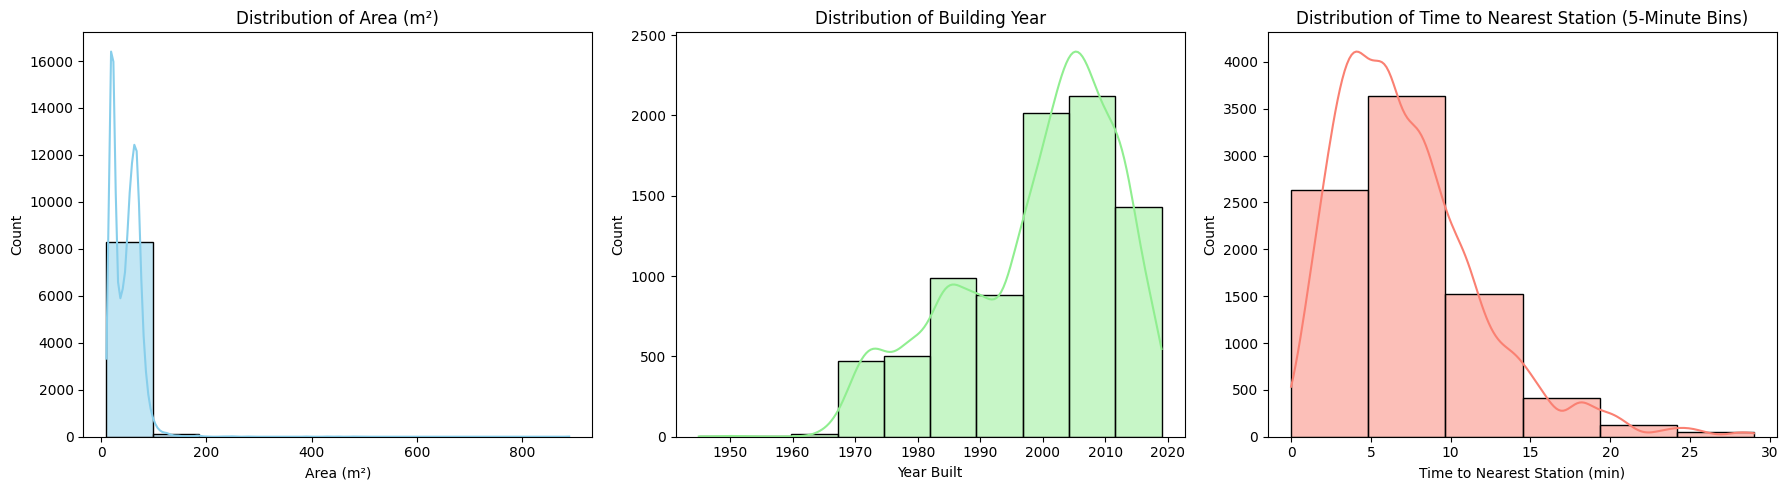

In [55]:
df['TimeToNearestStation'] = pd.to_numeric(df['TimeToNearestStation'], errors='coerce')
# Create subplots
plt.figure(figsize=(18, 5))

# 1. Area
plt.subplot(1, 3, 1)
sns.histplot(df['Area'], kde=True, bins=10, color="skyblue")
plt.title('Distribution of Area (m²)')
plt.xlabel('Area (m²)')
plt.ylabel('Count')

# 2. Building Year
plt.subplot(1, 3, 2)
sns.histplot(df['BuildingYear'], kde=True, bins=10, color="lightgreen")
plt.title('Distribution of Building Year')
plt.xlabel('Year Built')
plt.ylabel('Count')

# 3. Time to Nearest Station
plt.subplot(1, 3, 3)
sns.histplot(df['TimeToNearestStation'], binwidth=5, kde=True, color="salmon")
plt.title("Distribution of Time to Nearest Station (5-Minute Bins)")
plt.xlabel("Time to Nearest Station (min)")
plt.ylabel("Count")
max_time = int(df['TimeToNearestStation'].max())
plt.xticks(range(0, max_time + 5, 5))

plt.tight_layout()
plt.show()



# Model test

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import joblib

In [57]:
df

,Area,DistrictName,BuildingYear,TimeToNearestStation,Renovation,TradePrice
0,30,iidabashi,2013.0,4.0,Not yet,40000000
1,80,iidabashi,2007.0,4.0,Done,130000000
2,65,iidabashi,2007.0,4.0,Done,100000000
3,20,iidabashi,1997.0,4.0,Done,24000000
4,65,iidabashi,2003.0,4.0,Done,98000000
...,...,...,...,...,...,...
8422,65,yatocho,2014.0,11.0,Not yet,40000000
8423,85,yatocho,2003.0,9.0,Done,46000000
8424,75,yatocho,2003.0,17.0,Not yet,40000000
8425,80,yatocho,1997.0,2.0,Not yet,49000000


In [58]:
df.dropna(inplace=True)
# Encode categorical columns

le_district = LabelEncoder()

df['DistrictEncoded'] = le_district.fit_transform(df['DistrictName'])
df['RenovationEncoded'] = LabelEncoder().fit_transform(df['Renovation'])

# Define features and target
X = df[['Area', 'BuildingYear', 'TimeToNearestStation', 'DistrictEncoded', 'RenovationEncoded']]
y = df['TradePrice']


In [63]:
X

,Area,BuildingYear,TimeToNearestStation,DistrictEncoded,RenovationEncoded
0,30,2013.0,4.0,235,1
1,80,2007.0,4.0,235,0
2,65,2007.0,4.0,235,0
3,20,1997.0,4.0,235,0
4,65,2003.0,4.0,235,0
...,...,...,...,...,...
8422,65,2014.0,11.0,952,1
8423,85,2003.0,9.0,952,0
8424,75,2003.0,17.0,952,1
8425,80,1997.0,2.0,952,1


In [59]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "test_model.pkl")
joblib.dump(le_district, "district_encoder.pkl")

print("✅ Model saved as linear_regression_tokyo.pkl")


✅ Model saved as linear_regression_tokyo.pkl


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

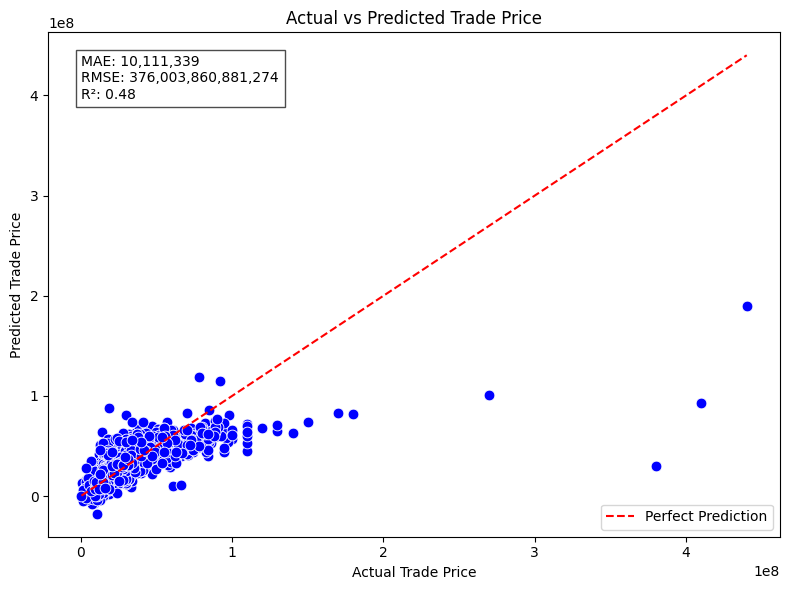

In [61]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')
plt.xlabel("Actual Trade Price")
plt.ylabel("Predicted Trade Price")
plt.title("Actual vs Predicted Trade Price")
plt.legend()

# Annotate plot with metrics
plt.text(y_test.min(), y_test.max(), f"MAE: {mae:,.0f}\nRMSE: {rmse:,.0f}\nR²: {r2:.2f}",
         horizontalalignment='left', verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

In [62]:
le_district = joblib.load("district_encoder.pkl")
print("Classes in loaded encoder:", le_district.classes_)


Classes in loaded encoder: ['adachi' 'aiharamachi' 'aioicho' 'akabane' 'akabanedai' 'akabanekita'
 'akabaneminami' 'akabanenishi' 'akasaka' 'akashicho' 'akatsuka'
 'akatsukashimmachi' 'akatsutsumi' 'akebonocho' 'akigawa' 'akiru'
 'amanuma' 'aobadai' 'aoi' 'aoto' 'aoyagi' 'arai' 'arakawa' 'arakicho'
 'ariake' 'asagayakita' 'asagayaminami' 'asahicho' 'asahigaoka' 'asakusa'
 'asakusabashi' 'atago' 'ayase' 'azabujuban' 'azabumamianacho'
 'azabunagasakacho' 'azumabashi' 'azumacho' 'azusawa' 'bentencho' 'bessho'
 'botan' 'bunka' 'chidori' 'chigasemachi' 'chihaya' 'chitose' 'chitosedai'
 'chofugaoka' 'chuo' 'chuocho' 'chuohoncho' 'daiba' 'daikan-yamacho'
 'daikyocho' 'daimachi' 'daimon' 'daita' 'daizawa' 'den-enchofu'
 'den-enchofuhoncho' 'den-enchofuminami' 'dogenzaka' 'ebara' 'ebisu'
 'ebisuminami' 'ebisunishi' 'edagawa' 'edogawa' 'egota' 'eharacho'
 'eifuku' 'eitai' 'enokicho' 'etchujima' 'fuchucho' 'fuda' 'fujimachi'
 'fujimi' 'fujimicho' 'fujimidai' 'fukagawa' 'fukasawa' 'fukuromachi'
 '